In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [24]:
mnist = tf.keras.datasets.fashion_mnist

In [25]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [29]:
import matplotlib.pyplot as plt

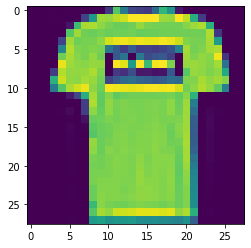

In [31]:
plt.imshow(X_train[1])

In [32]:
X_train = X_train/255
X_test = X_test/255

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
model = Sequential()

In [35]:
model.add(tf.compat.v1.keras.layers.CuDNNLSTM(128, input_shape =(28,28), return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.compat.v1.keras.layers.CuDNNLSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation = 'softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 28, 128)           80896     
                                                                 
 dropout_2 (Dropout)         (None, 28, 128)           0         
                                                                 
 cu_dnnlstm_4 (CuDNNLSTM)    (None, 128)               132096    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 217,450
Trainable params: 217,450
Non-trainable params: 0
_________________________________________________________________


In [37]:
opt = tf.keras.optimizers.Adam(lr = 1e-3, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [38]:
model.compile(optimizer=opt, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5827 - accuracy: 0.7858 - val_loss: 0.4446 - val_accuracy: 0.8381
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4013 - accuracy: 0.8519 - val_loss: 0.4043 - val_accuracy: 0.8466
